In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


분류 문제에서는 클래스에 대한 확률을 출력하기 위해 활성화 함수를 사용한다
회귀의 출력은 임의의 어떤 숫자이므로 활성화 함수를 적용할 필요가 없다
즉 출력층의 선형 방정식의 계산을 그대로 출력한다
이렇게 하기 위해 Dense층의 activation 매개변수에 아무런 값을 지정하지 않는다

In [3]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [4]:
model = keras.Sequential([dense1, dense2])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape= (784,)))
model.add(keras.layers.Dense(10,activation='softmax'))


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5706 - accuracy: 0.8067
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4119 - accuracy: 0.8516
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3767 - accuracy: 0.8653
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3521 - accuracy: 0.8734
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3335 - accuracy: 0.8784


시그모이드의 단점 : 왼쪽 끝과 오른쪽 끝으로 갈 수록 그래프가 누워있기에 올바른 출력을 만드는데 신속하게 대응하지 못한다  


In [14]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [15]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input /255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2 ,random_state=42)

In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target,epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5343 - accuracy: 0.8115
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3937 - accuracy: 0.8580
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3542 - accuracy: 0.8712
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3313 - accuracy: 0.8808
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3150 - accuracy: 0.8858


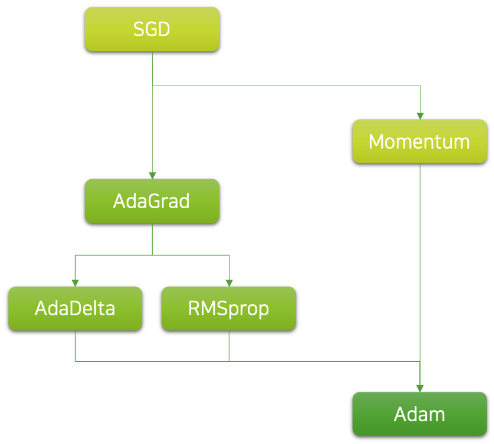

## [적응형학습률](https://kh-kim.github.io/nlp_with_deep_learning_blog/docs/1-11-optimizer/03-adaptive_lr/)

In [17]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3680 - accuracy: 0.8700


[0.36804845929145813, 0.8700000047683716]

In [ ]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
